# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

### Background
After building a successful restaurant five years ago, an entrepreneur has an idea for a new restaurant that she would like open in Memphis, TN. She will be meeting with potential investors and is preparing her pitch for startup funding. In order to refine her idea and improve her presentation to investors, she has solicited the help of an analyst to recommend a neighborhood in Memphis for the restaurant. The entrepreneur plans to use the analysis and findings to inform her decision on the restaurant location as well as strengthen the investable story that she will present to prospective investors.

### Business Problem
An entrepreneur is interested in opening a new restaurant in the Memphis, TN area and would like to determine a good location. Specifically, she would like to open a lunch restaurant that would appeal to workers on their lunch break. Typically, workers have a specific amount of time for lunch, and it is important to have dining options within close proximity to their workplace. The goal is to uncover a business opportunity in Memphis by finding an area with a significant number of workplaces and a relatively low number of food venues.

### Interest
The entrepreneur in Memphis is interested in this project to improve the likelihood of success of her new restaurant and to improve her chances of securing startup funding for the venture. This project could also be of interest to entrepreneurs in other cities since it seeks to identify an area where there is low supply and high consumer demand.

## Data <a name="data"></a>

### Data Sources
A CSV file containing Memphis Zip Codes and geographic coordinates was downloaded from Opendatasoft (https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?refine.state=TN).

The United States Census Bureau provides data on businesses with paid employees within the U.S. at the ZIP Code level (https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/zbp-api.html). A JSON file was downloaded from the US Census Bureau with the number of establishments and employees in each Memphis area Zip Code.

The location and proximity data of food venues in Memphis, TN came from Foursquare’s venue datasets. Foursquare’s venue categories (https://developer.foursquare.com/docs/build-with-foursquare/categories/) includes the main category of ‘Food’ which contains many subcatgories of food venues. The Food category and subcategories data will be used to find food venues near Memphis Zip Codes.

Download all dependencies for this project

In [1]:
import pandas as pd # pandas library for data analsysis

import json # library to handle JSON files

# use the inline backend to generate the plots within the browser
%matplotlib inline 

# Matplotlib and associated modules for plotting
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# library for geocoding
import geopy.geocoders
from geopy.geocoders import Nominatim

import requests # library for handling get requests

# library for SSL certificate verification
import ssl
import certifi
ctx = ssl.create_default_context(cafile=certifi.where())
geopy.geocoders.options.default_ssl_context = ctx

import folium # library for map rendering

Get the geographical coordinates of Memphis using a Zip Code that will center the map.

In [2]:
address = '38117'
geolocator = Nominatim(user_agent="memphis_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Memphis are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Memphis are 35.1156879, -89.8933472.


Use Memphis CSV file to create dataframe with latitude and longitude coordinates.

In [3]:
memphis_geo_data = pd.read_csv("memphis_zipcode_coordinates.csv")
memphis_geo_data.head()

,Zip,Latitude,Longitude
0,38016,35.177475,-89.776835
1,38018,35.157681,-89.782490
2,38103,35.146131,-90.053400
3,38104,35.133825,-90.004630
4,38105,35.152750,-90.035600


Generate a map of the Memphis area with markers showing the Zip Codes

In [4]:
map_memphis = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, zipcode in zip(memphis_geo_data['Latitude'], memphis_geo_data['Longitude'], memphis_geo_data['Zip']):
    label = '{}'.format(zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_memphis)  
    
map_memphis

### Explore the Employment Data

Load the json data

In [5]:
with open('memphis_employment_zipcode.json') as json_data:
    memphis_emp_data = json.load(json_data)

Viewing the data will show the number of establishments and employees in each Zip Code.

In [6]:
memphis_emp_data

[['ESTAB', 'EMP', 'zip code'],
 ['1414', '63512', '38118'],
 ['1006', '22368', '38119'],
 ['632', '19310', '38120'],
 ['477', '7138', '38122'],
 ['805', '16412', '38125'],
 ['119', '2602', '38126'],
 ['317', '4625', '38127'],
 ['150', '3554', '38108'],
 ['324', '6681', '38109'],
 ['551', '7734', '38111'],
 ['323', '7804', '38112'],
 ['313', '3930', '38114'],
 ['791', '18631', '38115'],
 ['809', '19910', '38116'],
 ['875', '16357', '38117'],
 ['847', '22431', '38103'],
 ['869', '19545', '38104'],
 ['118', '6959', '38105'],
 ['289', '6030', '38106'],
 ['134', '2195', '38107'],
 ['8', '192', '38152'],
 ['518', '9289', '38016'],
 ['467', '7929', '38128'],
 ['96', '4305', '38132'],
 ['914', '24576', '38133'],
 ['1274', '24005', '38134'],
 ['143', '1798', '38135'],
 ['990', '17708', '38138'],
 ['159', '1354', '38139'],
 ['269', '11342', '38141'],
 ['829', '12900', '38018'],
 ['31', '878', '38131']]

Remove the first row contaning the headers

In [7]:
memphis_emp_data.pop(0)

['ESTAB', 'EMP', 'zip code']

Use the Employment data to create a dataframe, name the columns, and convert columns to int.

In [8]:
memphis_emp_zip = pd.DataFrame(memphis_emp_data,columns=['Establishments', 'Employees', 'Zip'])
memphis_emp_zip['Establishments'] = memphis_emp_zip['Establishments'].astype(int)
memphis_emp_zip['Employees'] = memphis_emp_zip['Employees'].astype(int)

View the first 5 rows of the dataframe

In [9]:
memphis_emp_zip.head()

,Establishments,Employees,Zip
0,1414,63512,38118
1,1006,22368,38119
2,632,19310,38120
3,477,7138,38122
4,805,16412,38125


Create a new dataframe with just Employees and Zip Code columns and sort by Employees

In [10]:
memphis_employees = pd.DataFrame(memphis_emp_zip[['Zip', 'Employees']])
memphis_employees.sort_values(by='Employees', ascending=False, inplace=True)
memphis_employees = memphis_employees.reset_index(drop=True)

### Visualize the Employment Data

Plotting the data as a bar chart shows which Zip Codes have the highest number of employees

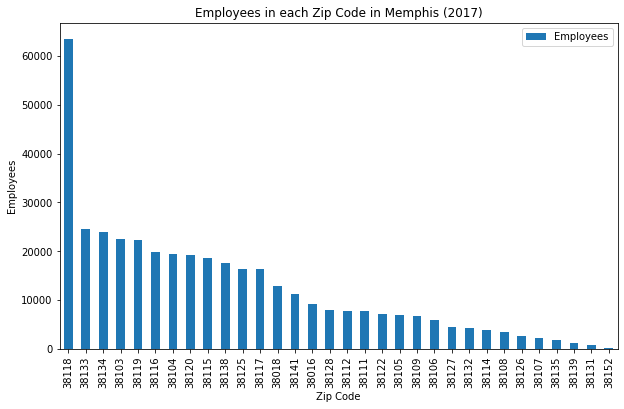

In [11]:
memphis_employees.plot(kind='bar', x='Zip', y='Employees', figsize=(10, 6))

plt.xlabel('Zip Code') # add to x-label to the plot
plt.ylabel('Employees') # add y-label to the plot
plt.title('Employees in each Zip Code in Memphis (2017)') # add title to the plot

plt.show()

Let's look at the top 5 Zip Codes by number of employees.  
**38118** has a high number of employees.

In [12]:
memphis_employees.head()

,Zip,Employees
0,38118,63512
1,38133,24576
2,38134,24005
3,38103,22431
4,38119,22368


### Map the data

Use the GeoJSON file memphis_zip_codes_geo.min.json to choropleth map

In [13]:
memphis_geo = r'memphis_zip_codes_geo.min.json' # Memphis geojson file

# create a Memphis map using the openstreetmap style
memphis_map_emp = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='openstreetmap')

Generate the choropleth map as another way to visualize the employment data and see which Zip Codes are near each other. Hovering over an area will dispay it's Zip Code.  
  
We see that the South Eastern part of the city has the largest number of employees, although it is more spread out than the Downtown and Midtown areas which also have significant employment numbers.

In [14]:
choropleth_emp = folium.Choropleth(
    geo_data=memphis_geo,
    data=memphis_employees,
    columns=['Zip', 'Employees'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Memphis employees by zip code'
).add_to(memphis_map_emp)

# Display Region Label
choropleth_emp.geojson.add_child(
    folium.features.GeoJsonTooltip(['ZCTA5CE10'], labels=False)
)

# display map
memphis_map_emp

Foursquare credentials for the API

In [15]:
CLIENT_ID = 'GSLC5NU3BAI1XVIVW2AB0LW24ZZQWIFINXE4POVAHUJXNMZR'
CLIENT_SECRET = 'GZPTBK4DEJIDMUCPE2E5JXHTPYGKSBT2EAGFE4PIQ52CZ252'
VERSION = '20180605'

Function to get up to 100 venues within a radius of 1000 meters of each Zip Code. The Food categoryID is passed to the function so that it only returns food venues.

In [16]:
def getNearbyVenues(names, latitudes, longitudes, CATEGORY_ID='4d4b7105d754a06374d81259', radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            CATEGORY_ID,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip', 
                  'Zip Latitude', 
                  'Zip Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Use the function to create a new dataframe for the Memphis food venues

In [17]:
memphis_venues = getNearbyVenues(names=memphis_geo_data['Zip'],
                                   latitudes=memphis_geo_data['Latitude'],
                                   longitudes=memphis_geo_data['Longitude']
                                  )

38016
38018
38103
38104
38105
38106
38107
38108
38109
38111
38112
38114
38115
38116
38117
38118
38119
38120
38122
38125
38126
38127
38128
38131
38132
38133
38134
38135
38138
38139
38141
38152


View the size and first 10 rows of the dataframe

In [18]:
print(memphis_venues.shape)
memphis_venues.head(10)

(448, 7)


,Zip,Zip Latitude,Zip Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,38016,35.177475,-89.776835,Mothers Home Cooking,35.174643,-89.784228,Fried Chicken Joint
1,38018,35.157681,-89.782490,Pacific Fusion Buffet & Grill,35.156362,-89.793242,Asian Restaurant
2,38018,35.157681,-89.782490,G. Alston,35.156372,-89.777670,Restaurant
3,38018,35.157681,-89.782490,Cafe Cordova,35.156260,-89.777590,American Restaurant
4,38018,35.157681,-89.782490,Wasabi Sushi & Sake Bar,35.155331,-89.792775,Japanese Restaurant
5,38018,35.157681,-89.782490,Mikado Sushi & Sake Bar,35.155233,-89.792956,Sushi Restaurant
6,38103,35.146131,-90.053400,Flight Restaurant and Wine Bar,35.144260,-90.053297,Tapas Restaurant
7,38103,35.146131,-90.053400,Maciel's Tortas & Tacos,35.144000,-90.053038,Mexican Restaurant
8,38103,35.146131,-90.053400,McEwen's,35.144030,-90.052621,American Restaurant
9,38103,35.146131,-90.053400,The Little Tea Shop,35.144443,-90.054051,Southern / Soul Food Restaurant


## Methodolgy <a name="methodology"></a>

In order to recommend a good location for a lunch restaurant, the goal is to find an area with a high number of employees and relatively low number of food venues. Although not all employees work the same schedule, it is assumed for the purposes of this project that most employees reflected in the data work a regular daytime schedule.

The Zip Code geographic data was obtained from Opendatasoft. The employment data was acquired from the United States Census Bureau. The location and proximity data of food venues came from Foursquare. Dataframes were then used to explore and clean the data to distill it down to what would be needed to conduct the analysis.

Data analysis will be used to find which Zip Codes have a relatively low number of food venues per number of employees. This will be determined by grouping the venues within 1000 meters of each Zip Code to find the total number food venues for each Zip Code. The total food venues will then be divided by number of employees for Zip Code and then multiplied by 2500. This formula will show the number of food venues per 2500 employees for each Zip Code.

The Zip Code with the lowest number of food venues per 2500 employees will be a top candidate to recommend as a business opportunity for a new lunch restaurant. Before making a final recommendation, the choropleth map will be reviewed in light of the findings. 

## Analysis <a name="analysis"></a>

Group the venues for each Zip code into a new dataframe to see the total number of food venues for each Zip Code.

In [19]:
memphis_venues_count = memphis_venues[['Zip', 'Venue']].groupby('Zip').count()
memphis_venues_count.reset_index(inplace=True)

View the totals

In [20]:
memphis_venues_count

,Zip,Venue
0,38016,1
1,38018,5
2,38103,70
3,38104,41
4,38105,14
5,38106,4
6,38107,4
7,38108,2
8,38111,30
9,38112,12


Create a new dataframe from the employees dataframe that will be used to join with the venue totals.

In [21]:
memphis_employees_venues = memphis_employees

Check datatypes before joining dataframes

In [22]:
memphis_venues_count.dtypes

Zip      int64
Venue    int64
dtype: object

In [23]:
memphis_employees_venues.dtypes

Zip          object
Employees     int64
dtype: object

Convert Zip to int in the memphis_employees_venues dataframe in order to join

In [24]:
memphis_employees_venues['Zip'] = memphis_employees_venues['Zip'].astype(int)

Join the dataframes to prepare to calculate the restaurants per number of employees

In [25]:
memphis_employees_venues = memphis_employees_venues.join(memphis_venues_count.set_index('Zip'), on='Zip')

View the dataframe

In [26]:
memphis_employees_venues.reset_index(drop=True)

,Zip,Employees,Venue
0,38118,63512,7.0
1,38133,24576,18.0
2,38134,24005,4.0
3,38103,22431,70.0
4,38119,22368,1.0
5,38116,19910,4.0
6,38104,19545,41.0
7,38120,19310,4.0
8,38115,18631,17.0
9,38138,17708,51.0


Calculate the number of restaurants per 2500 employees and add the values to a new column in the dataframe.

In [27]:
memphis_employees_venues['Rate'] = (memphis_employees_venues['Venue']/memphis_employees_venues['Employees'])*2500

Sort by number of restaurants so that the result is easy to see on bar chart.

In [28]:
memphis_employees_venues.sort_values(by='Rate', inplace=True)

View the dataframe

In [29]:
memphis_employees_venues.reset_index(drop=True)

,Zip,Employees,Venue,Rate
0,38119,22368,1.0,0.111767
1,38016,9289,1.0,0.269136
2,38118,63512,7.0,0.275538
3,38134,24005,4.0,0.416580
4,38116,19910,4.0,0.502260
5,38120,19310,4.0,0.517866
6,38018,12900,5.0,0.968992
7,38128,7929,4.0,1.261193
8,38108,3554,2.0,1.406866
9,38141,11342,7.0,1.542938


Remove the last 3 rows

In [30]:
memphis_employees_venues = memphis_employees_venues[:-3]

## Results <a name="results"></a>

Plot the results on a bar chart to see which Zip Codes have the lowest number of restaurants per 2500 employees.

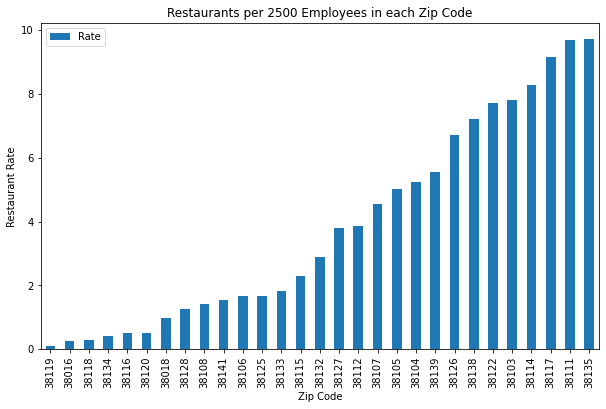

In [31]:
memphis_employees_venues.plot(kind='bar', x='Zip', y='Rate', figsize=(10, 6))

plt.xlabel('Zip Code') # add to x-label to the plot
plt.ylabel('Restaurant Rate') # add y-label to the plot
plt.title('Restaurants per 2500 Employees in each Zip Code') # add title to the plot

plt.show()

**38119** has the lowest number of restaurants per 2500 employees

## Discussion <a name="Discussion"></a>

Although **38119** is the top candidate, let's revisit the choropleth map in light of this finding.

In [32]:
memphis_map_emp

**38016** and **38118** also have low numbers of restaurants per 2500 employees.  
Let's look at where those Zip Codes are located as well as the density of employees in adjacent Zip Codes.  

**38016** has a relatively low number of employees. Althought the adjacent Zip Codes have more employees; it becomes more rural towards the Eastern part of the Zip Code. For these reasons it doesn't appear to be a better candidate than **38119**.

**38118** has the highest number of employees but is spread over a large area. It also looks more rural towards the Southern part. Although it doesn't appear to be a better candidate then **38119**, the North Eastern quadrant of **38118** would make a good second choice.

## Conclusion <a name="Conclusion"></a>

The goal of this project is to identify a business opportunity for an entrepreneur to open a lunch restaurant in Memphis, TN. After applying the methodology above and conducting the analysis, **38119** is recommended due to its low number of restaurants per number of employees working in this area.  

Availability of commercial real estate and pricing are other factors that will need to be considered. If either of these factors are a problem in **38119**, the North Eastern quadrant of **38118** would be a good alternative location to consider.